# Programming Exercise 2: Logistic Regression

In [1]:
# imports here

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. 

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

### Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

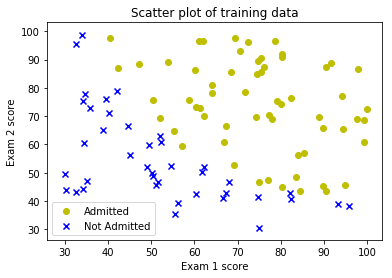

In [2]:
def plot_data():
    from numpy import loadtxt, where
    from pylab import scatter, show, legend, xlabel, ylabel

    #load the dataset
    data = loadtxt('ex2data1.txt', delimiter=',')

    X = data[:, 0:2]
    y = data[:, 2]

    pos = where(y == 1)
    neg = where(y == 0)
    scatter(X[pos, 0], X[pos, 1], marker='o', c='y')
    scatter(X[neg, 0], X[neg, 1], marker='x', c='b')
    xlabel('Exam 1 score')
    ylabel('Exam 2 score')
    legend(['Admitted', 'Not Admitted'])
    plt.title('Scatter plot of training data')
    show()
    
plot_data()  

In [3]:
data = pd.read_csv("ex2data1.txt", sep=",", header=None, names=['X1', 'X2', 'y'])
data.head()

,X1,X2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
X = data[['X1', 'X2']]
y = data['y']

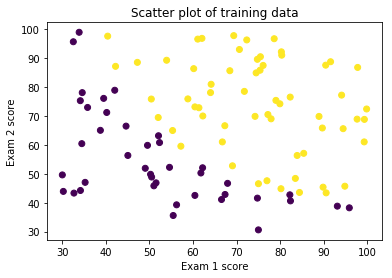

In [5]:
plt.scatter(data['X1'],data['X2'],c=y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Scatter plot of training data')

plt.show()

## Implementation

### Sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as: $h_{\theta}(x) = g(\theta^{T}x)$, where function g is the sigmoid function. The sigmoid function is defined as: $g(z) = \frac{1}{1+e^{-z}}$ .

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(0)

0.5

### Cost function and gradient
Now you will implement the cost function and gradient for logistic regression. Recall that the cost function in logistic regression is $J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$ and the gradient of the cost is a vector of the same length as $\theta$ where the j th element (for j = 0, 1, . . . , n) is defined as follows: $\frac{\partial J(\theta )}{\partial \theta _{j}} = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta }(x^{(i)})-y^{(i)})x_{j}^{(i)}$ . Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_{\theta }(x)$.

In [7]:
def costFunction(theta, X, y):
    
    m = y.shape[0]
    h_theta = sigmoid(np.matmul(X, theta))
    error = np.matmul(y.T, np.log(h_theta)) + np.matmul((1-y).T, np.log(1 - h_theta))
    J = -error / m
    
    grad = np.matmul(X.T, (h_theta-y)) / m
    
    return (J, grad)

In [8]:
m, n = X.shape # Number of features

In [9]:
ones = pd.DataFrame(np.ones((m, 1)), columns=['ones'])
X = pd.concat([ones, X], axis=1) # Add a column of ones to X

In [10]:
X.head()

,ones,X1,X2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


In [11]:
initial_theta = np.zeros((n + 1, 1))
cost, grad = costFunction(initial_theta, X, y.values.reshape((m, 1)))

print(cost)
print(grad)

[[0.69314718]]
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


### Learning parameters

In [12]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=costFunction, x0=initial_theta, args=(X, y))

In [13]:
result

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)

### Evaluating logistic regression
For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

In [14]:
theta = result[0]

In [15]:
probability = sigmoid(np.matmul([1, 45, 85], theta.T))
probability

0.7762906217710582

In [16]:
def classifierPredict(theta, X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = np.matmul(X, theta)
    
    return predictions > 0

p = classifierPredict(theta, X)
print("Train Accuracy: {} %".format(sum(p==y)))

Train Accuracy: 89 %


### Plotting the decision boundary

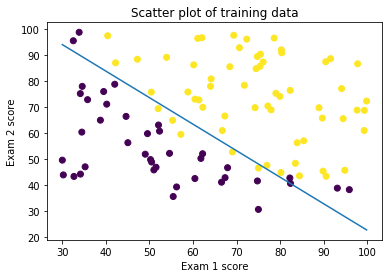

In [17]:
# Only need 2 points to define a line, so choose two endpoints

def plotDecisionBoundary(theta, X, y):
    plt.scatter(X.X1, X.X2, c=y)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.title('Scatter plot of training data')
    
    plot_X1 = np.array([min(X.X1), max(X.X1)])
    plot_X2 = -(theta[0] + theta[1] * plot_X1)/theta[2]
    plt.plot(plot_X1, plot_X2)
    
    plt.show()
    
plotDecisionBoundary(theta, X, y)

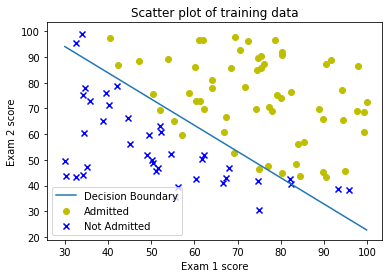

In [18]:
def plotDecisionBoundary(theta, X, y):
    from numpy import loadtxt, where
    from pylab import scatter, show, legend, xlabel, ylabel

    #load the dataset
    data = loadtxt('ex2data1.txt', delimiter=',')

    X = data[:, 0:2]
    y = data[:, 2]
    
    pos = where(y == 1)
    neg = where(y == 0)
    scatter(X[pos, 0], X[pos, 1], marker='o', c='y')
    scatter(X[neg, 0], X[neg, 1], marker='x', c='b')
    xlabel('Exam 1 score')
    ylabel('Exam 2 score')
    
    plt.title('Scatter plot of training data')
    
    plot_X1 = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_X2 = -(theta[0] + theta[1] * plot_X1)/theta[2]
    plt.plot(plot_X1, plot_X2)
    
    legend(['Decision Boundary', 'Admitted', 'Not Admitted'])
    
    show()
    
plotDecisionBoundary(theta, X, y)    